In [ ]:
## JSON exercise

#Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
#1. Find the 10 countries with most projects
#2. Find the top 10 major project themes (using column 'mjtheme_namecode')
#3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [13]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [14]:
# load as Pandas dataframe
df = pd.read_json('world_bank_projects.json')
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

# 1.  Find the 10 countries with most projects

In [38]:
country_list=df.countryname.value_counts()
country_list[:10]

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

In [ ]:
#OR

In [39]:
country_list=df.groupby('countryname')['project_name'].count().sort_values(ascending=False).head(10)
country_list

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: project_name, dtype: int64

Text(0.5,1,'Top 10 Countries')

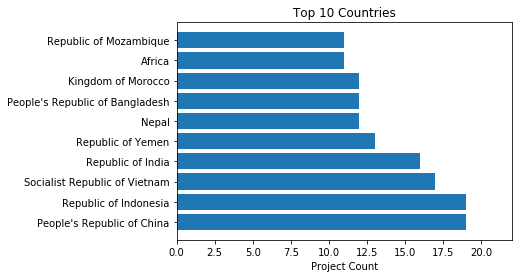

In [133]:
plt.barh(country_list.index,country_list.sort_values(ascending=False))
plt.xlim(0, 22) 
plt.xlabel('Project Count')
plt.title('Top 10 Countries')

# 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [5]:
projects=df.mjtheme_namecode
list_projects=projects.tolist()
new_projects=[item for sublist in list_projects for item in sublist]
df2=pd.DataFrame(new_projects)

In [134]:
ten_project=df2.name.value_counts()
ten_project[:10]

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

Text(0.5,1,'Top 10 Countries')

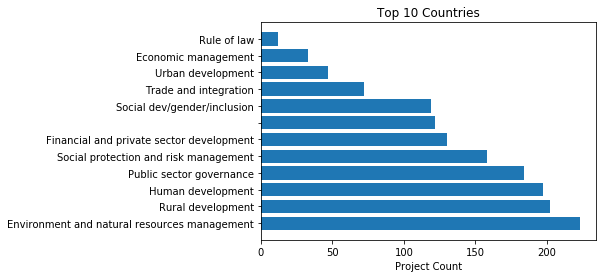

In [138]:
plt.barh(ten_project.index,ten_project.values)
plt.xlabel('Project Count')
plt.title('Top 10 Projects')

# 3.    In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
s=df2['name']==''
s.value_counts()

False    1377
True      122
Name: name, dtype: int64

In [10]:
new_projects = df2.applymap(lambda x: np.nan if x == '' else x)
#new_projects = df2.applymap(lambda x: 'Missing_Value' if x == '' else x)

In [11]:
new_projects.head()

,code,name
0,8,Human development
1,11,NaN
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [ ]:
new_projects.ffill()

In [ ]:
#Another approach
new_projects.fillna('Missing_Value')